<center><h1 style="color:green">Transfer Learning</h1>

In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os
import PIL

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
import tf_keras

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

<b>First Make predictions without any training

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf_keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [3]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

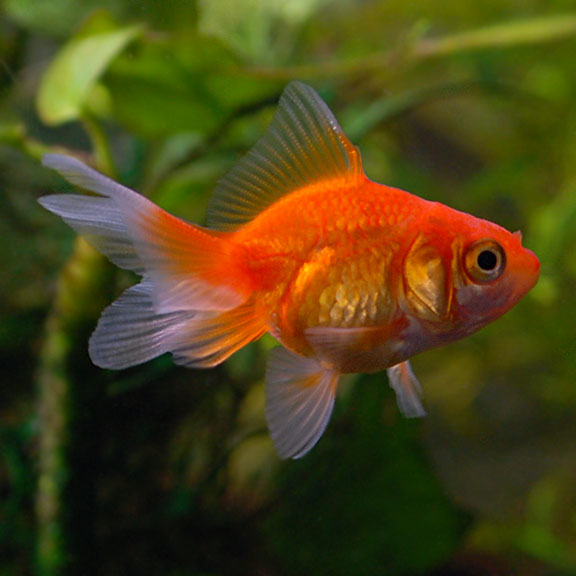

In [4]:
gold_fish = Image.open("goldfish.jpg")
gold_fish

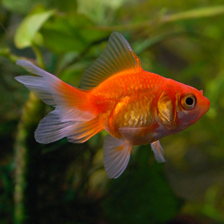

In [5]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [6]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [7]:
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

<b>Reason for doing this (add a new dimension) is to handle multiple images as input

In [8]:
gold_fish[np.newaxis, ...] 

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [9]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [10]:
classifier.predict(gold_fish[np.newaxis, ...])

1/1 [==============================] - 2s 2s/step


array([[ 0.22101411,  2.0474913 ,  9.622562  , ..., -1.4621551 ,
        -0.28146487, -0.25984856]], dtype=float32)

In [11]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 859ms/step


(1, 1001)

In [12]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [13]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [14]:
image_labels[predicted_label_index]

'goldfish'

<h1>Load Flower Dataset</h1>

In [15]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [16]:
data_dir

'.\\datasets\\flower_photos'

In [17]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [18]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [19]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [20]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

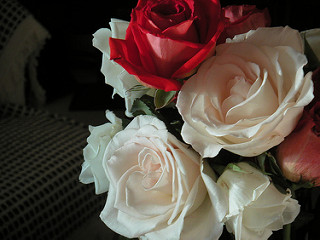

In [21]:
PIL.Image.open(str(roses[1]))

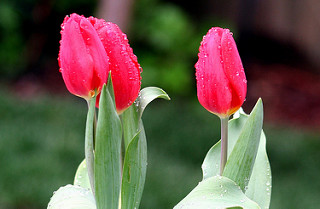

In [22]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h1 style="color:green">Read flowers images from disk into numpy array using opencv</h1>

In [23]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [24]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [25]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [26]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [27]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [28]:
img.shape

(240, 179, 3)

In [29]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [30]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [31]:
X = np.array(X)
y = np.array(y)

<b>Test Train Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<b>Scaling

In [33]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<b>Make prediction using pre-trained model on new flowers dataset

In [34]:
X[0]

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 16,  7],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 8, 22, 14],
        [ 8, 22, 14],
        [ 7, 21, 14],
        ...,
        [21, 47, 31],
        [24, 49, 34],
        [25, 51, 35]],

       [[12, 22, 15],
        [12, 22, 15],
        [11, 22, 14],
        ...,
        [21, 43, 31],
        [24, 46, 33],
        [26, 48, 36]],

       ...,

       [[17, 29, 25],
        [14, 25, 20],
        [13, 22, 15],
        ...,
        [ 2, 11,  2],
        [ 0,  7,  1],
        [ 0,  4,  0]],

       [[19, 30, 28],
        [18, 28, 25],
        [16, 25, 19],
        ...,
        [ 2, 10,  2],
        [ 1,  8,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [15, 23, 22],
        [19, 27, 24],
        ...,
        [ 1, 11,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [35]:
X[0].shape

(224, 224, 3)

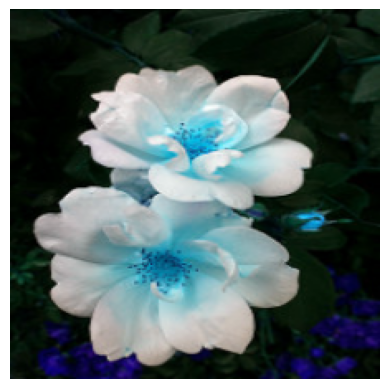

In [36]:
plt.axis('off')
plt.imshow(X[0])

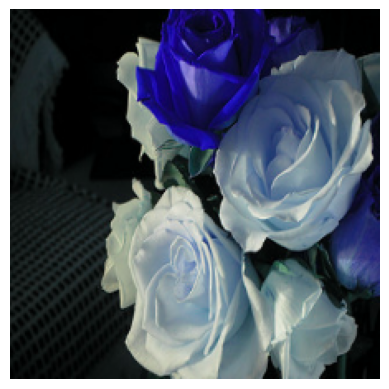

In [37]:
plt.axis('off')
plt.imshow(X[1])

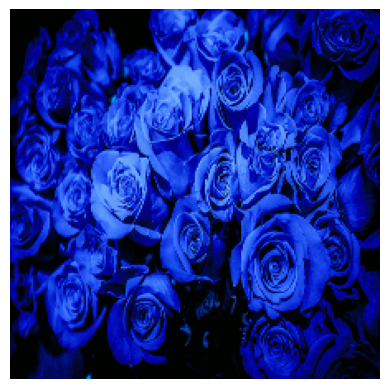

In [38]:
plt.axis('off')
plt.imshow(X[2])

In [39]:
classifier.predict(np.array([X[0],X[1],X[2]]))

1/1 [==============================] - 1s 1s/step


array([[ 0.22718737,  0.3929901 ,  1.4730681 , ..., -1.2507945 ,
        -1.9604888 ,  3.8786209 ],
       [ 0.30456832, -0.5805602 ,  0.7134101 , ..., -1.7760245 ,
        -2.3320367 ,  4.359388  ],
       [ 0.23661563, -0.43386507,  0.9326359 , ..., -1.4441891 ,
        -0.855314  ,  3.2079208 ]], dtype=float32)

In [40]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 140ms/step


array([795, 880, 795], dtype=int64)

In [41]:
image_labels[795]

'shower curtain'

In [42]:
image_labels[880]

'umbrella'

<h1>Now take pre-trained model and retrain it using flowers images</h1>

In [43]:
# This is a pre-trained deep learning model that extracts high-level features from images without including the final classification layer
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [44]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [45]:
num_of_flowers = 5

model = tf_keras.Sequential([
  pretrained_model_without_top_layer,
  tf_keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [46]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5



86/86 [==============================] - 47s 399ms/step - loss: 0.9252 - acc: 0.6530
Epoch 2/5
86/86 [==============================] - 31s 355ms/step - loss: 0.4315 - acc: 0.8492
Epoch 3/5
86/86 [==============================] - 30s 353ms/step - loss: 0.3358 - acc: 0.8917
Epoch 4/5
86/86 [==============================] - 30s 351ms/step - loss: 0.2733 - acc: 0.9124
Epoch 5/5
86/86 [==============================] - 31s 357ms/step - loss: 0.2383 - acc: 0.9306


In [47]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 12s 382ms/step - loss: 0.3746 - acc: 0.8660


[0.37457454204559326, 0.8660130500793457]